<hr>
<!-- Header -->
<div>
    <center style='font-size:60px;margin-top:40px;margin-bottom:20px'><strong>Concordia University</strong></center>
    <center style='color:gray;font-size:18px;margin-top:40px'>Dept. of Computer Science & Software Engineering
    </center>
<div>

<!-- Body -->
<div style='font-size:18px;margin-top:60px'>
    <center>COMP 6731 & COMP 473</center>
    <center>Pattern Recognition</center>
</div>

<div style='margin-top:100px'>
    <center style='font-size:18px'><strong>Assignment_2_3</strong></center>
</div>

<!-- footer -->
<div style='font-size:17px;margin-top:150px'>
    <div style='margin-top:15px;margin-bottom:15px'>
        <span><strong>All Team members: </strong></span><span>Dong Chen, Peilin Jiang, Peirang Wang</span>
    </div>
    <div style='margin-top:15px;margin-bottom:15px'>
        <span><strong>Student IDs: </strong></span><span>40013109, 40015338, 40009962</span>
    </div>
    <div style='margin-top:15px;margin-bottom:15px'>
        <span><strong>Team Leader: </strong></span><span>Dong Chen</span>
    </div>
    <div style='margin-top:15px;margin-bottom:15px'>
        <span><strong>Professor: </strong></span><span>Javad Sadri</span>
    </div>
</div>
<hr>

# Question 1  
<center>![Question 1](Question_1.PNG)</center>


# Question 2

## a)

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

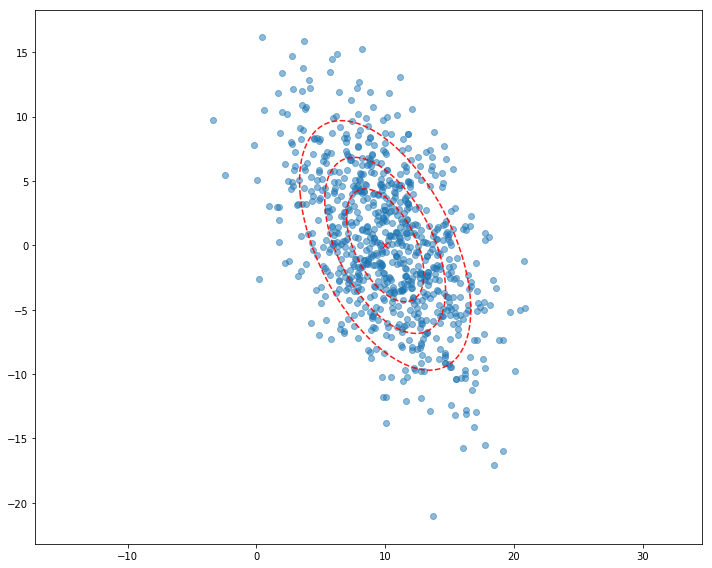

In [2]:
from scipy.stats import multivariate_normal

mean = np.array([10, 0])
cov = np.array([[16, -12],[-12, 34]])

x, y = np.random.multivariate_normal(mean, cov, 800).T

x_range, y_range = np.mgrid[np.min(x):np.max(x):0.1, np.min(y):np.max(y):0.1]
pos = np.dstack((x_range, y_range))
rv = multivariate_normal(mean, cov)

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(mean[0], mean[1], marker='x', color='red')
ax.contour(x_range, y_range, rv.pdf(pos), 4, alpha=0.9, linestyles='dashed', colors='red')
ax.scatter(x, y, marker='o', alpha=0.5)
ax.axis('equal')
plt.tight_layout()

## b)

In [3]:
from numpy import linalg as LA
w, v = LA.eig(cov)

In [4]:
print('Eigenvalues of covariance matrix (S): ')
w

Eigenvalues of covariance matrix (S): 


array([ 10.,  40.])

In [5]:
print('λ1 = {}'.format(w[0]))
print('λ2 = {}'.format(w[1]))

λ1 = 10.0
λ2 = 40.0


## c)

In [6]:
print('Eigenvectors of covariance matrix (S): ')
v = v/v[0][1]
v

Eigenvectors of covariance matrix (S): 


array([[-2.,  1.],
       [-1., -2.]])

In [7]:
print('Φ1 = {}'.format(v[:,0]))
print('Φ2 = {}'.format(v[:,1]))

Φ1 = [-2. -1.]
Φ2 = [ 1. -2.]


## d)

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x, y, marker='o', alpha=0.4)
ax.plot(mean[0], mean[1], marker='x', color='red')
ax.arrow(mean[0], mean[1], v[:,0][0]*3, v[:,0][1]*3, head_width=0.7, head_length=1, color='red')
ax.arrow(mean[0], mean[1], v[:,1][0]*6, v[:,1][1]*6, head_width=0.7, head_length=1, color='blue')
ax.axis('equal')
plt.tight_layout()

# Question 3

## a)

Import all the related package
* pandas
* numpy
* confusion_matrix
* accuracy_score

In [37]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

Read __Train_Data.csv__ which provided from Question 5 of assignment 1.

In [38]:
train_df = pd.read_csv('./Train_Data.csv')
train_df

,X1,X2,X3,Target
0,-5.01,-8.12,-3.68,W1
1,-5.43,-3.48,-3.54,W1
2,1.08,-5.52,1.66,W1
3,0.86,-3.78,-4.11,W1
4,-2.67,0.63,7.39,W1
5,4.94,3.29,2.08,W1
6,-2.51,2.09,-2.59,W1
7,-2.25,-2.13,-6.94,W1
8,5.56,2.86,-2.26,W1
9,1.03,-3.33,4.33,W1


Read Test_Data.csv which generated from Question 5 of assignment 1.

In [39]:
test_df = pd.read_csv('./Test_Data.csv')
test_df

,X1,X2,X3,Target
0,2.4101,0.2924,3.7338,W1
1,-3.7154,-2.7079,0.4595,W1
2,-4.5009,-0.2766,-1.7177,W1
3,-1.7871,-1.7094,-2.7944,W1
4,3.1849,-3.4995,-2.6520,W1
5,-0.6887,-3.0439,0.5024,W2
6,-5.4011,-0.2100,4.1131,W2
7,-3.6513,3.1021,5.2564,W2
8,-9.5652,0.1425,2.8403,W2
9,-3.6905,1.7712,4.9109,W2


Transfer Training & Testing Target of [W1, W2, W3] to [0, 1, 2]  
Split Traning data sets into train_data & train_target  
Split Testing data sets into test_data & test_target

In [40]:
# A function that transfer Target of [W1, W2, W3] to [0, 1, 2]
def target_transform(target):
    if target == 'W1':
        return 0
    elif target == 'W2':
        return 1
    else:
        return 2
    
train_df.Target = train_df.Target.transform(target_transform)
test_df.Target = test_df.Target.transform(target_transform)

train_data = train_df[['X1', 'X2', 'X3']]
train_target = train_df['Target']

test_data = test_df[['X1', 'X2', 'X3']]
test_target = test_df['Target']

Create a plot function for confusion matrix

In [167]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

def confusion_matrix_plot(conf_mat, plot_title):
    sns.heatmap(conf_mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['W1', 'W2', 'W3'],
            yticklabels=['W1', 'W2', 'W3'],
            cmap="BuPu")
    plt.title(plot_title, fontsize=15)
    plt.xlabel('True Targets', fontsize=15)
    plt.ylabel('Predicted Targets', fontsize=15)
    plt.show()

### KNN with K = 3, distance = Euclidean

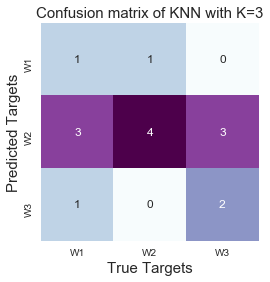

Accuracy of KNN with K=3: 0.466667


In [168]:
from sklearn.neighbors import KNeighborsClassifier
knn_3 = KNeighborsClassifier(n_neighbors=3, metric='euclidean').fit(train_data, train_target)

knn_3_predict = knn_3.predict(test_data)

knn_3_con_mat = confusion_matrix(test_target, knn_3_predict)
confusion_matrix_plot(knn_3_con_mat, 'Confusion matrix of KNN with K=3')
print('Accuracy of KNN with K=3: {:0.6f}'.format(accuracy_score(test_target, knn_3_predict)))

### KNN with K = 5, distance = Euclidean

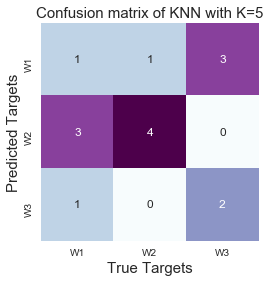

Accuracy of KNN with K=5: 0.466667


In [67]:
knn_5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_5.fit(train_data, train_target)

knn_5_predict = knn_5.predict(test_data)

knn_5_con_mat = confusion_matrix(test_target, knn_5_predict)
confusion_matrix_plot(knn_5_con_mat, 'Confusion matrix of KNN with K=5')
print('Accuracy of KNN with K=5: {:0.6f}'.format(accuracy_score(test_target, knn_5_predict)))

### PNN

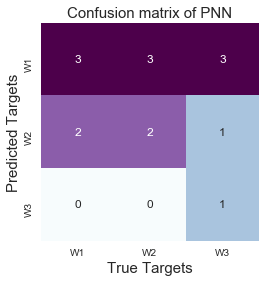

Accuracy of PNN: 0.400000


In [68]:
from neupy.algorithms import PNN

pnn = PNN()
pnn.fit(train_data, train_target)

pnn_predict = pnn.predict(test_data)

pnn_con_mat = confusion_matrix(test_target, pnn_predict)
confusion_matrix_plot(pnn_con_mat, 'Confusion matrix of PNN')
print('Accuracy of PNN: {:0.6f}'.format(accuracy_score(test_target, pnn_predict)))

### SVM 

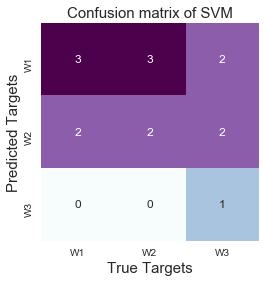

Accuracy of SVM: 0.400000


In [70]:
from sklearn.svm import SVC

# rbf is Gaussian Kernel
svc = SVC(kernel='rbf')
svc.fit(train_data, train_target)

svc_predict = svc.predict(test_data)

svc_con_mat = confusion_matrix(test_target, svc_predict)
confusion_matrix_plot(svc_con_mat, 'Confusion matrix of SVM')
print('Accuracy of SVM: {:0.6f}'.format(accuracy_score(test_target, svc_predict)))

### MLP

/Users/AlexChen/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


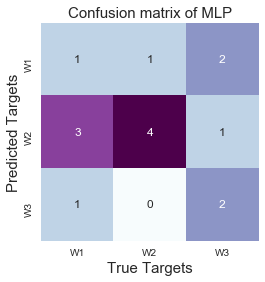

Accuracy of MLP: 0.466667


In [76]:
from sklearn.neural_network import MLPClassifier

# ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
mlp = MLPClassifier(activation='logistic')
mlp.fit(train_data, train_target)

mlp_predict = mlp.predict(test_data)

mlp_con_mat = confusion_matrix(test_target, mlp_predict)
confusion_matrix_plot(mlp_con_mat, 'Confusion matrix of MLP')
print('Accuracy of MLP: {:0.6f}'.format(accuracy_score(test_target, mlp_predict)))

## b)

In [74]:
from sklearn.model_selection import GridSearchCV

### KNN Optimization

Best parameter of KNN: {'n_neighbors': 5}


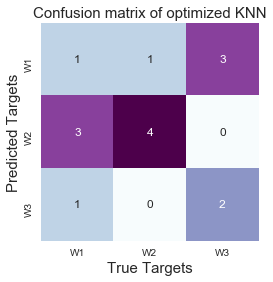

Accuracy of optimized KNN: 0.466667


In [85]:
param_grid_knn = {
    'n_neighbors': [1,3,5,7,9]
}

knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5).fit(train_data, train_target)
knn_predict = knn.predict(test_data)

knn_con_mat = confusion_matrix(test_target, knn_predict)
print('Best parameter of KNN: {}'.format(knn.best_params_))
confusion_matrix_plot(knn_con_mat, 'Confusion matrix of optimized KNN')
print('Accuracy of optimized KNN: {:0.6f}'.format(accuracy_score(test_target, knn_predict)))

### PNN Optimization

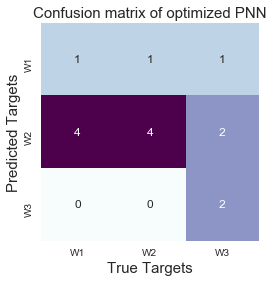

Accuracy of PNN: 0.466667


In [86]:
from neupy.algorithms import PNN

pnn = PNN(std=1)
pnn.fit(train_data, train_target)

pnn_predict = pnn.predict(test_data)

pnn_con_mat = confusion_matrix(test_target, pnn_predict)
confusion_matrix_plot(pnn_con_mat, 'Confusion matrix of optimized PNN')
print('Accuracy of PNN: {:0.6f}'.format(accuracy_score(test_target, pnn_predict)))

### SVM Optimization

Best parameter of SVM: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


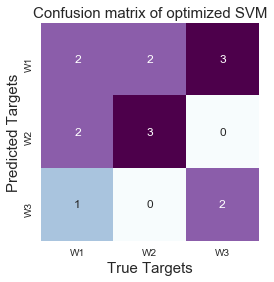

Accuracy of SVM: 0.466667


In [89]:
param_grid_svc = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']} 
]

# cv for cross-validation
svc = GridSearchCV(SVC(class_weight='balanced'), param_grid_svc, cv=5)

svc = svc.fit(train_data, train_target)
svc_predict = svc.predict(test_data)

svc_con_mat = confusion_matrix(test_target, svc_predict)
print('Best parameter of SVM: {}'.format(svc.best_params_))
confusion_matrix_plot(svc_con_mat, 'Confusion matrix of optimized SVM')
print('Accuracy of SVM: {:0.6f}'.format(accuracy_score(test_target, svc_predict)))

### MLP Optimization

Best parameter of MLP: {'hidden_layer_sizes': 10, 'solver': 'lbfgs'}


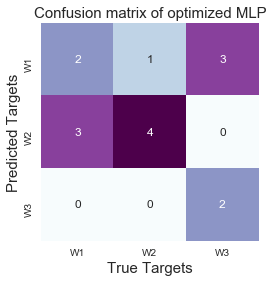

Accuracy of MLP: 0.533333


In [91]:
param_grid_mlp = {
    'hidden_layer_sizes': [1,5,10,15,20],
    'solver': ['lbfgs'],
}

mlp = GridSearchCV(MLPClassifier(), param_grid_mlp, cv=5)
mlp.fit(train_data, train_target)

mlp_predict = mlp.predict(test_data)

mlp_con_mat = confusion_matrix(test_target, mlp_predict)
print('Best parameter of MLP: {}'.format(mlp.best_params_))
confusion_matrix_plot(mlp_con_mat, 'Confusion matrix of optimized MLP')
print('Accuracy of MLP: {:0.6f}'.format(accuracy_score(test_target, mlp_predict)))

## c)

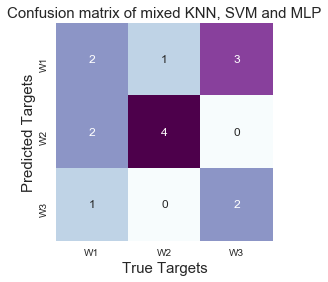

Accuracy of mixed KNN, SVM and MLP: 0.533333


In [154]:
from scipy.stats import mode

c_knn = KNeighborsClassifier(n_neighbors=5).fit(train_data, train_target)
c_svm = SVC(kernel='rbf', C=1000, gamma=0.001, class_weight='balanced').fit(train_data, train_target)
c_mlp = MLPClassifier(hidden_layer_sizes=5, solver='lbfgs').fit(train_data, train_target)

models = [c_knn, c_svm, c_mlp]
vote = []
mix_pred = []

for i in range(len(test_data)):
    for index, clf in enumerate(models):
        vote.append(clf.predict(pd.DataFrame(test_data.iloc[i]).T)[0])
    mix_pred.append(mode(vote)[0][0])
    vote.clear()

mix_con_mat = confusion_matrix(test_target, np.array(mix_pred))
confusion_matrix_plot(mix_con_mat, 'Confusion matrix of mixed KNN, SVM and MLP')

print('Accuracy of mixed KNN, SVM and MLP: {:0.6f}'.format(accuracy_score(test_target, np.array(mix_pred))))

## d)

In [156]:
from sklearn.cluster import KMeans

In [157]:
# K means cluster
model = KMeans(n_clusters=3, random_state=0)
model.fit(test_data)
print(model.labels_)

[1 1 1 1 1 1 0 0 0 0 1 2 1 1 2]


In [158]:
test_df['Predict_Target'] =  np.choose(model.labels_, [1, 0, 2]).astype(np.int64)
test_df

,X1,X2,X3,Target,Predict_Target
0,2.4101,0.2924,3.7338,0,0
1,-3.7154,-2.7079,0.4595,0,0
2,-4.5009,-0.2766,-1.7177,0,0
3,-1.7871,-1.7094,-2.7944,0,0
4,3.1849,-3.4995,-2.6520,0,0
5,-0.6887,-3.0439,0.5024,1,0
6,-5.4011,-0.2100,4.1131,1,1
7,-3.6513,3.1021,5.2564,1,1
8,-9.5652,0.1425,2.8403,1,1
9,-3.6905,1.7712,4.9109,1,1


In [160]:
print('Accuracy : {}'.format(accuracy_score(test_target, test_df['Predict_Target'])))

Accuracy : 0.7333333333333333


In [163]:
from scipy.spatial.distance import cdist

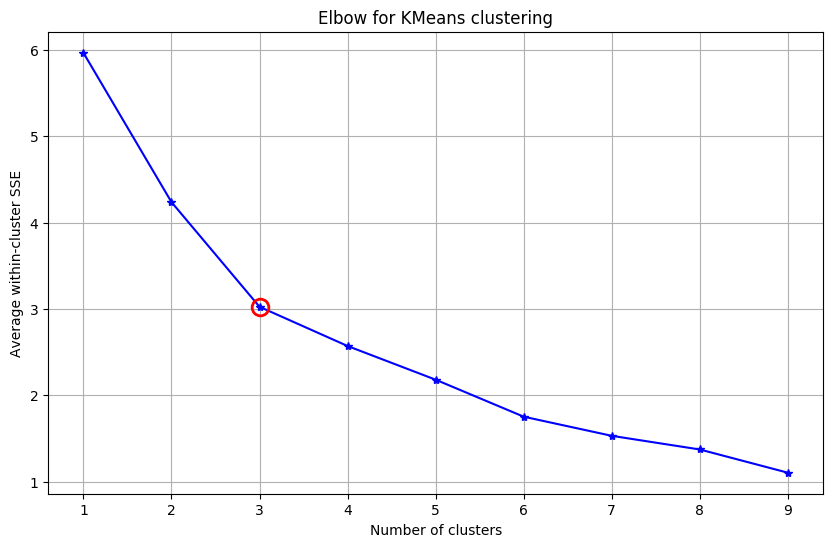

In [171]:
K = range(1, 10)
KM = [KMeans(n_clusters=k).fit(test_data) for k in K]
# KM[0], n_clusters = 1
# KM[1], n_clusters = 2
# KM[2], n_clusters = 3
centroids = [k.cluster_centers_ for k in KM]

D_k = [cdist(test_data, cent, 'euclidean') for cent in centroids]

dist = [np.min(D,axis=1) for D in D_k]

avgWithinSS = [sum(d)/test_data.shape[0] for d in dist]

# Total with-in sum of square
wcss = [sum(d**2) for d in dist]

kIdx = 2

# elbow curve
# Set the size of the plot
plt.rcdefaults()
plt.figure(figsize=(10,6))
plt.subplot()
plt.plot(K, avgWithinSS, 'b*-')
plt.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12,
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster SSE')
plt.title('Elbow for KMeans clustering')
plt.show()